<a href="https://colab.research.google.com/github/Axlbenja/MiamiDadeCounty_EmployeePay_2025/blob/main/MiamiDadeCounty_EmployeePay_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import zscore

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/Axlbenja/MiamiDadeCounty_EmployeePay_2025/main/MiamiDadeCounty_EmployeePay_2025.csv', sep=',')

In [87]:
df.head()


,LastName,FirstName,MiddleInitial,Title,DeptName,AnnualSalary,GrossPayLastPaycheck,GrossYTD,ObjectId
0,LUC,AUNDREA,S,WASTE ENFORCEMENT OFFICER 1,SOLID WASTE MANAGEMENT,81592.186,9359.04,9359.04,1
1,LUE,KEISHA,RENEE,SHARED SERVICES SPECIALIST,HUMAN RESOURCES,56423.161,2756.12,2756.12,2
2,LUO,SEI,Y,SECRETARY,POLICE,40767.761,1640.86,1640.86,3
3,LYS,JACQUES,E,DTPW SERVICE SPECIALIST 2,TRANSPORTATION & PUBLIC WORKS,87534.450,3410.16,3410.16,4
4,MAS,JOSE,R,RER PERMIT & PLANS REP,REGULATORY & ECONOMIC RESOURCE,59237.468,2321.84,2321.84,5


In [88]:
print(df.columns)

Index(['LastName', 'FirstName', 'MiddleInitial', 'Title', 'DeptName',
       'AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD', 'ObjectId'],
      dtype='object')


# Tukey Method of Removing Outliers

In [89]:
df['AnnualSalary']

,AnnualSalary
0,81592.186
1,56423.161
2,40767.761
3,87534.450
4,59237.468
...,...
30075,24411.309
30076,68955.996
30077,35131.980
30078,133535.101


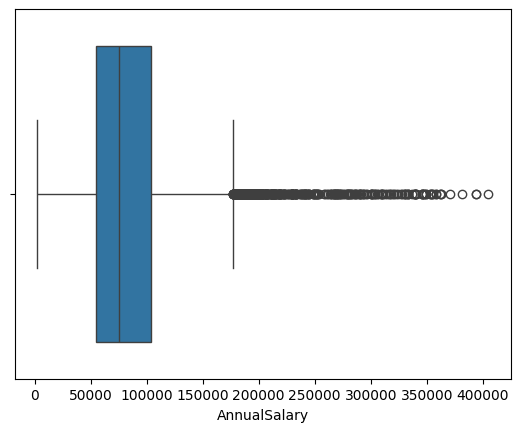

In [90]:
sns.boxplot(x = df['AnnualSalary'])
plt.show()

<ipython-input-91-5d05606cf536>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AnnualSalary'], bins = 15, kde=True)


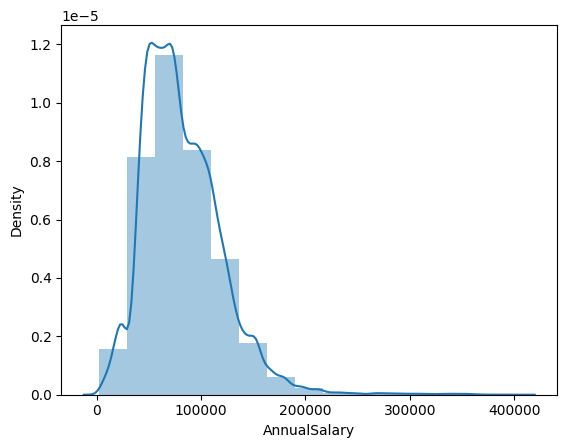

In [91]:
sns.distplot(df['AnnualSalary'], bins = 15, kde=True)
plt.show()

In [92]:
df[['AnnualSalary']].describe()

,AnnualSalary
count,30080.000000
mean,82348.446577
std,38386.282757
min,2340.000000
25%,54923.809000
50%,75423.226000
75%,103789.099000
max,405012.307000


In [93]:
df['AnnualSalary'].quantile(0.25)

54923.809

In [94]:
df['AnnualSalary'].quantile(0.75)

103789.099

In [95]:
Q1 = df['AnnualSalary'].quantile(0.25)
Q3 = df['AnnualSalary'].quantile(0.75)
IQR = Q3 - Q1
IQR

48865.29

In [96]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

In [97]:
lower_lim

-18374.125999999997

In [98]:
upper_lim

177087.03399999999

In [99]:
outliers_15_low = df[df['AnnualSalary'] < lower_lim]
outliers_15_low['AnnualSalary']

,AnnualSalary


In [100]:
outliers_15_up = df[df['AnnualSalary'] > upper_lim]
outliers_15_up['AnnualSalary']

,AnnualSalary
9,194999.561
33,189109.371
41,180482.647
62,240643.665
81,353426.580
...,...
29718,218122.737
29791,269933.300
29839,216636.714
29899,239588.960


In [101]:
len(df['AnnualSalary']) - (len(outliers_15_low) + len(outliers_15_up))

29511

In [102]:
outliers = df[(df['AnnualSalary'] < lower_lim) | (df['AnnualSalary'] > upper_lim)]
outliers['AnnualSalary']

,AnnualSalary
9,194999.561
33,189109.371
41,180482.647
62,240643.665
81,353426.580
...,...
29718,218122.737
29791,269933.300
29839,216636.714
29899,239588.960


In [103]:
df = df[~((df['AnnualSalary'] < lower_lim) | (df['AnnualSalary'] > upper_lim))]

In [104]:
df

,LastName,FirstName,MiddleInitial,Title,DeptName,AnnualSalary,GrossPayLastPaycheck,GrossYTD,ObjectId
0,LUC,AUNDREA,S,WASTE ENFORCEMENT OFFICER 1,SOLID WASTE MANAGEMENT,81592.186,9359.04,9359.04,1
1,LUE,KEISHA,RENEE,SHARED SERVICES SPECIALIST,HUMAN RESOURCES,56423.161,2756.12,2756.12,2
2,LUO,SEI,Y,SECRETARY,POLICE,40767.761,1640.86,1640.86,3
3,LYS,JACQUES,E,DTPW SERVICE SPECIALIST 2,TRANSPORTATION & PUBLIC WORKS,87534.450,3410.16,3410.16,4
4,MAS,JOSE,R,RER PERMIT & PLANS REP,REGULATORY & ECONOMIC RESOURCE,59237.468,2321.84,2321.84,5
...,...,...,...,...,...,...,...,...,...
30075,LORIE MARTINEZ PINILLOS,ALEXEI,ANTONIO,GOLF SERVICE ATTENDANT,"PARKS, RECREATION & OPEN SPCS",24411.309,238.70,4013.98,30076
30076,PANAITOV SILVA SANTIAGO,THIAGO,NaN,POLICE OFFICER,POLICE,68955.996,3841.06,3841.06,30077
30077,DEL VALLE ALVAREZ-COLINA,ENMAIBET,NaN,PROPERTY EXEMPTIONS CLERK,OFFICE OF THE PROPRTY APPRAISR,35131.980,1394.69,1394.69,30078
30078,GONZALEZ LOPEZ DE GAMARRA,JUAN ANTONIO,NaN,JA COMP SERVICES MANAGER,ADM OFFICE OF THE COURT,133535.101,7716.61,7716.61,30079


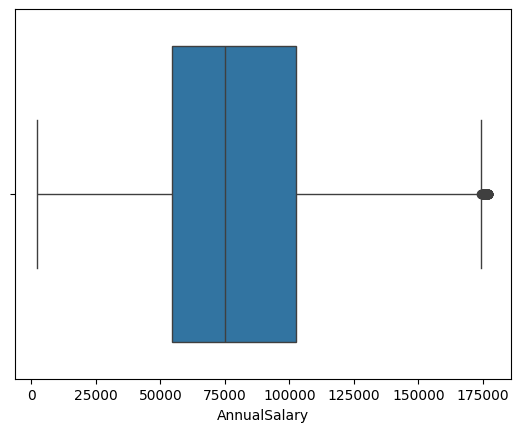

In [105]:
sns.boxplot(x=df['AnnualSalary'])
plt.show()

# Winsorize Method of Identifying and Removing Outliers

In [106]:
print(df.head())

  LastName FirstName MiddleInitial                        Title  \
0      LUC   AUNDREA             S  WASTE ENFORCEMENT OFFICER 1   
1      LUE    KEISHA         RENEE   SHARED SERVICES SPECIALIST   
2      LUO       SEI             Y                    SECRETARY   
3      LYS   JACQUES             E    DTPW SERVICE SPECIALIST 2   
4      MAS      JOSE             R       RER PERMIT & PLANS REP   

                         DeptName  AnnualSalary  GrossPayLastPaycheck  \
0          SOLID WASTE MANAGEMENT     81592.186               9359.04   
1                 HUMAN RESOURCES     56423.161               2756.12   
2                          POLICE     40767.761               1640.86   
3   TRANSPORTATION & PUBLIC WORKS     87534.450               3410.16   
4  REGULATORY & ECONOMIC RESOURCE     59237.468               2321.84   

   GrossYTD  ObjectId  
0   9359.04         1  
1   2756.12         2  
2   1640.86         3  
3   3410.16         4  
4   2321.84         5  


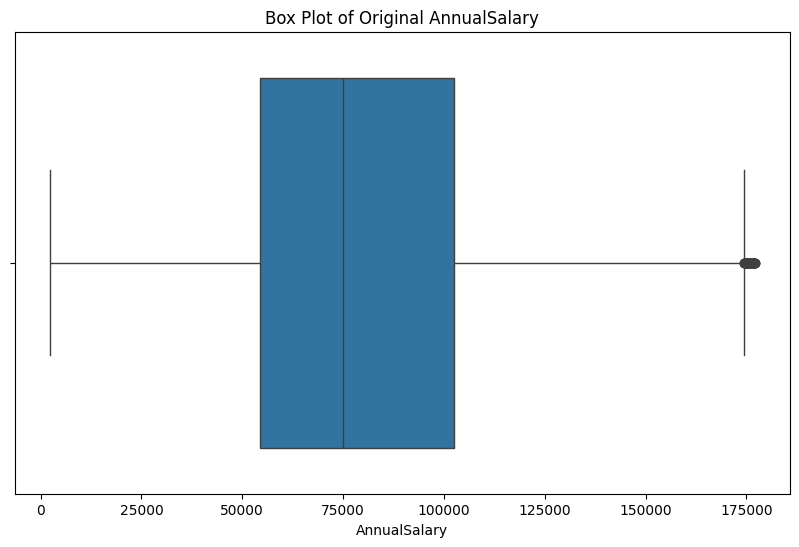

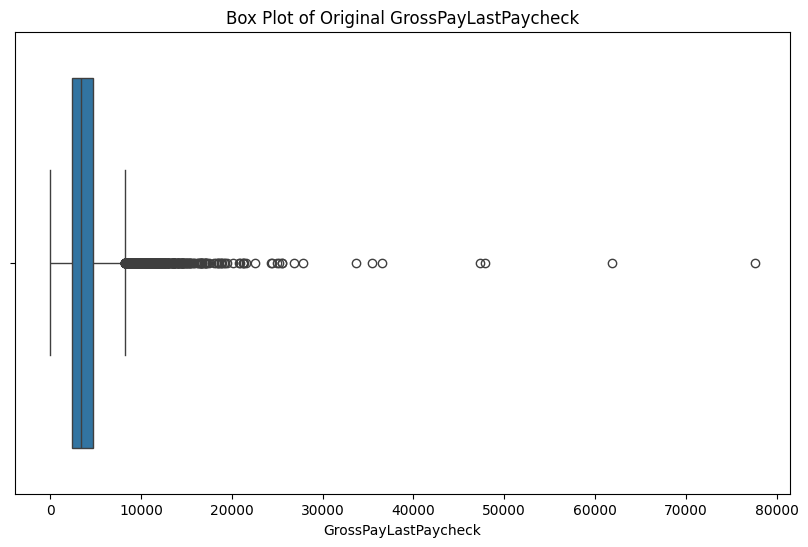

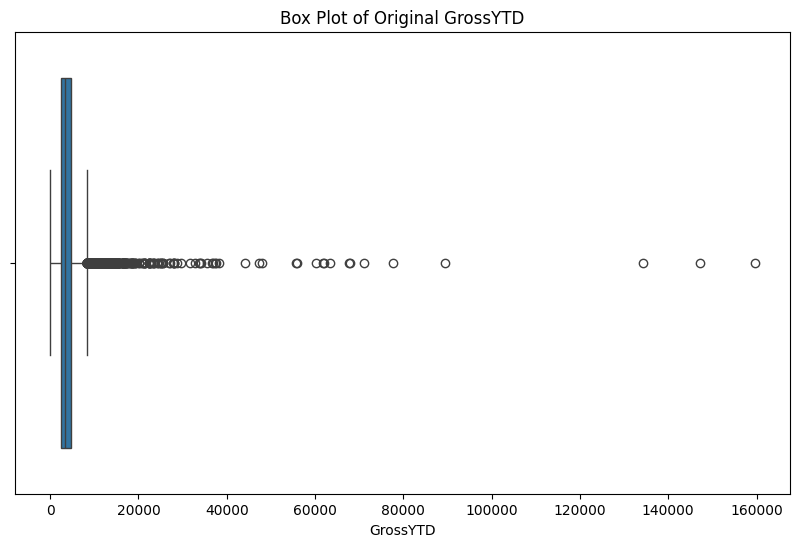

In [109]:
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of Original {col}')
    plt.show()

<ipython-input-110-f69126cb738e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=10, kde=False)


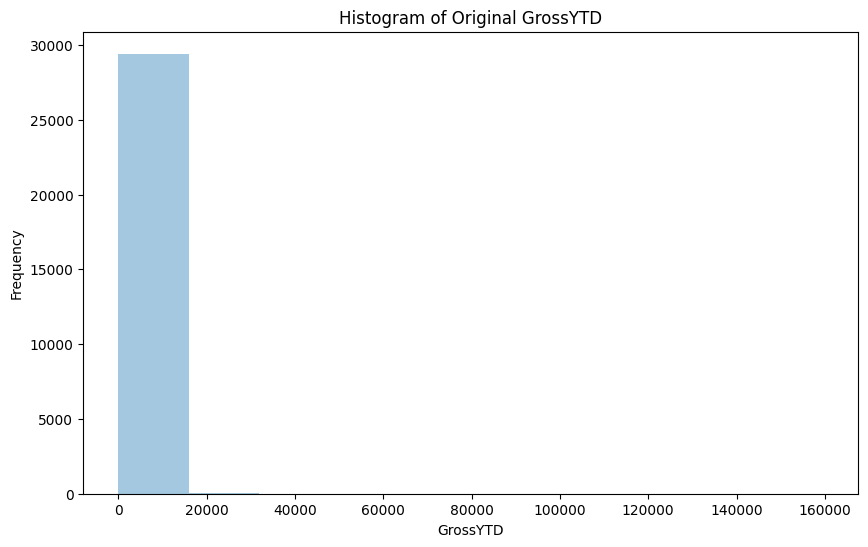

In [110]:
    # Histogram for original data
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col], bins=10, kde=False)
    plt.title(f'Histogram of Original {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [111]:
def winsorize_column(df, column, limits=[0.01, 0.01]):
    # Winsorizing the column
    df[f"{column}_Winsorized"] = winsorize(df[column], limits=limits)

    # Display the first few rows of the winsorized data
    print(f"\nFirst Few Rows of Winsorized {column}:")
    print(df[f"{column}_Winsorized"].head())

In [113]:
    # Box plot for winsorized data
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[f"{column}_Winsorized"])
    plt.title(f'Box Plot of Winsorized {column}')
    plt.show()
    # Histogram for winsorized data
    plt.figure(figsize=(10, 6))
    sns.distplot(df[f"{column}_Winsorized"], bins=10, kde=False)
    plt.title(f'Histogram of Winsorized {column}')
    plt.xlabel(f"{column}_Winsorized")
    plt.ylabel('Frequency')
    plt.show()

NameError: name 'column' is not defined

<Figure size 1000x600 with 0 Axes>

# Log Transformation

In [82]:
print(df.head())

  LastName FirstName MiddleInitial                        Title  \
0      LUC   AUNDREA             S  WASTE ENFORCEMENT OFFICER 1   
1      LUE    KEISHA         RENEE   SHARED SERVICES SPECIALIST   
2      LUO       SEI             Y                    SECRETARY   
3      LYS   JACQUES             E    DTPW SERVICE SPECIALIST 2   
4      MAS      JOSE             R       RER PERMIT & PLANS REP   

                         DeptName  AnnualSalary  GrossPayLastPaycheck  \
0          SOLID WASTE MANAGEMENT     81592.186               9359.04   
1                 HUMAN RESOURCES     56423.161               2756.12   
2                          POLICE     40767.761               1640.86   
3   TRANSPORTATION & PUBLIC WORKS     87534.450               3410.16   
4  REGULATORY & ECONOMIC RESOURCE     59237.468               2321.84   

   GrossYTD  ObjectId  AnnualSalary_Winsorized  \
0   9359.04         1                81592.186   
1   2756.12         2                56423.161   
2   1640

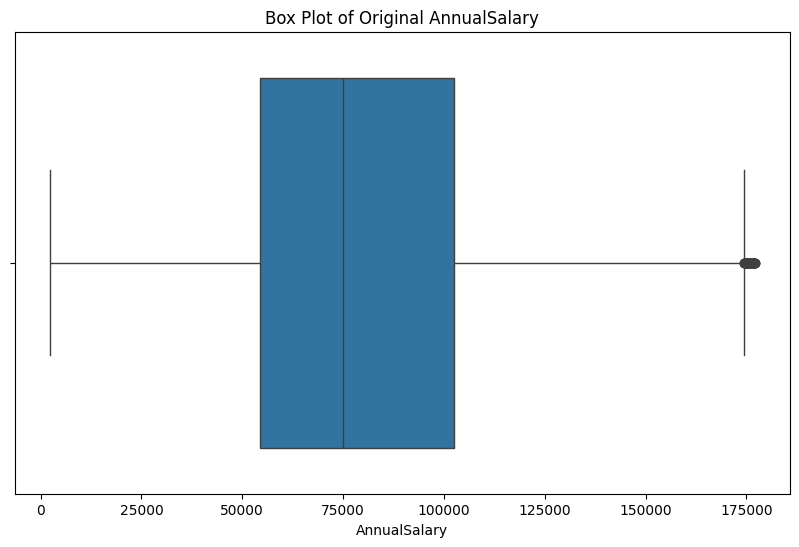

<ipython-input-83-68c7b59b37a5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=10, kde=False)


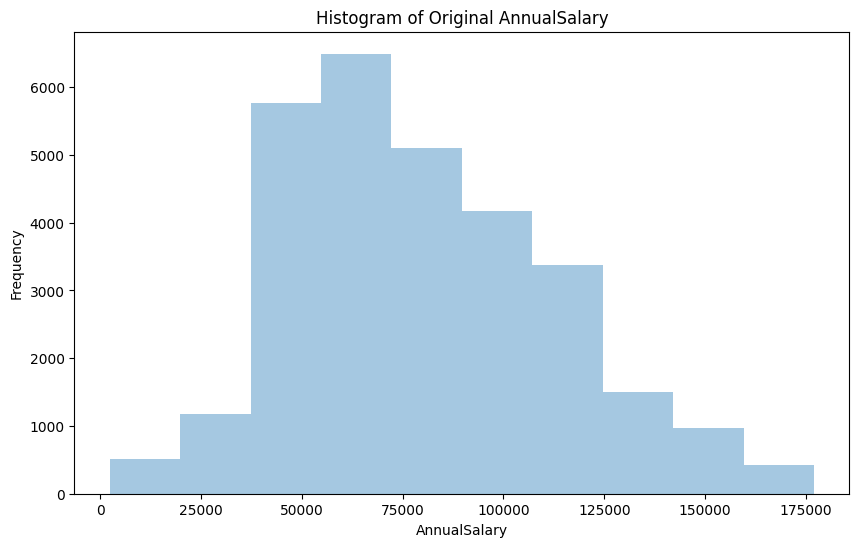

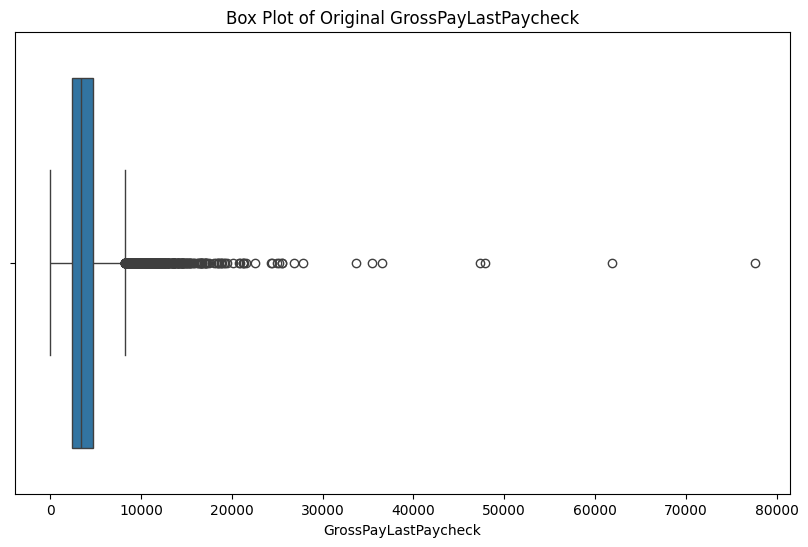

<ipython-input-83-68c7b59b37a5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=10, kde=False)


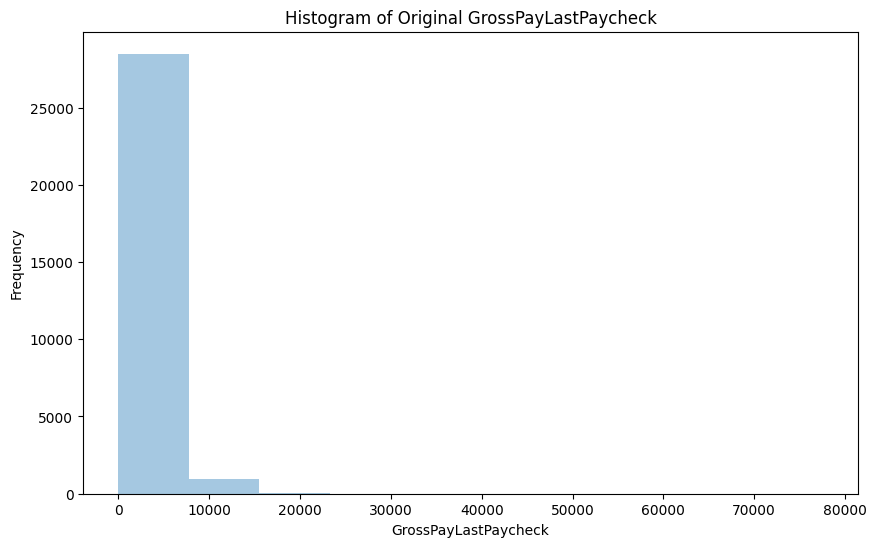

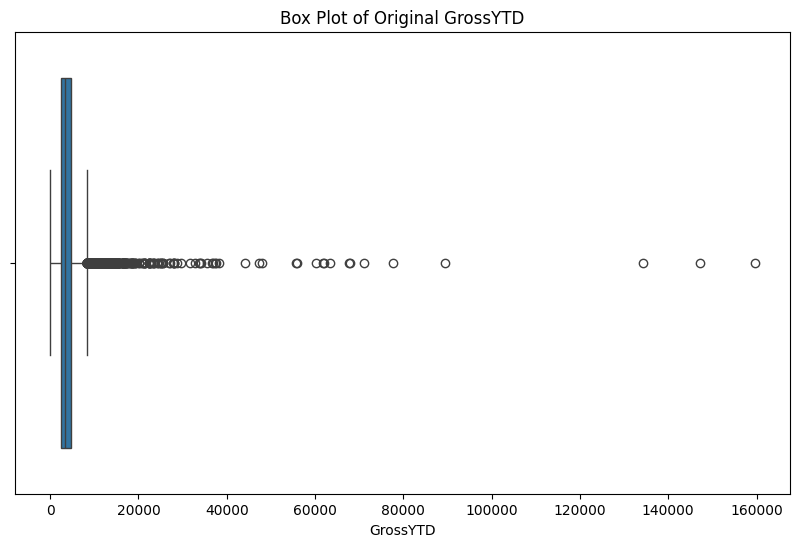

<ipython-input-83-68c7b59b37a5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=10, kde=False)


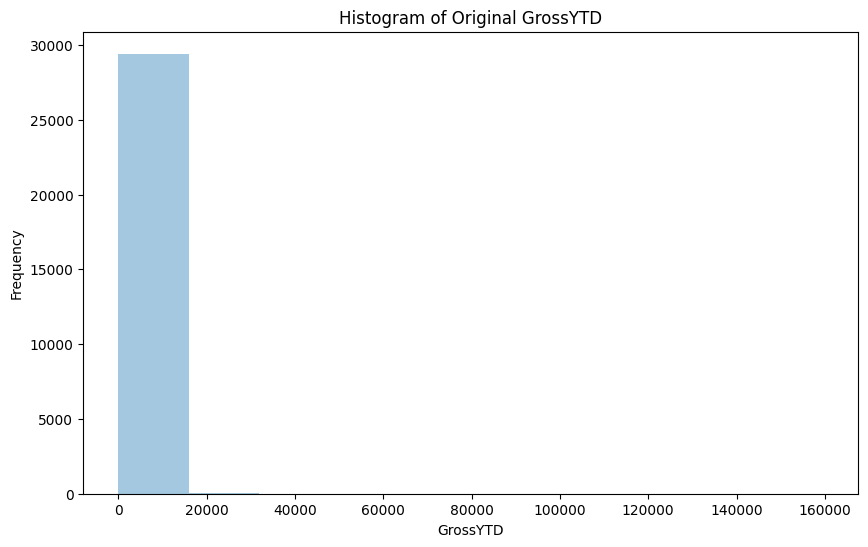

In [83]:
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of Original {col}')
    plt.show()

    # Histogram for original data
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col], bins=10, kde=False)
    plt.title(f'Histogram of Original {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()